In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
# Crit information
PCR=0.85
CD=1.6

Character='Eula'
# Character='Ayaka'

# Attack configuration paramters(must be consistent with character)
StringLength=5
TimeWindow=180 #(in seconds)

# probability of missing
Pmiss=0.02

# Total samples of Y to be taken(Will sample Bernoulli distribution Trials*StringLength*TotalSamples number of times, (however some samplings are inherently parallelized) )
TotalYSamples=10000

In [3]:
# Time of AA string(estimated) in units of seconds
if(Character=='Ayaka'):
        TimeofAA=2.42
elif(Character=='Eula'):
        TimeofAA=4.06

Trials=np.int(np.ceil(TimeWindow/TimeofAA))  # esimated from time attack window as measured by time. We take a finite average across the number of AA strings in this window.
print("Number of Trials in Time Window:",Trials)


Number of Trials in Time Window: 45


In [4]:
if (Character=='Ayaka'):
    ## Ayaka
    Di=np.zeros((StringLength,Trials))
    BaseDMG=1649 # Non-crit + pre-talent multiplier base damage
    Di[0,:]=0.84*BaseDMG
    Di[1,:]=.894*BaseDMG
    Di[2,:]=1.15*BaseDMG
    Di[3,:]=.416*3*BaseDMG
    Di[4,:]=1.436*BaseDMG
elif (Character=="Eula") :
    ## Eula
    Di=np.zeros((StringLength,Trials))
    BaseDMG=2821 # Non-crit + pre-talent multiplier base damage
    Di[0,:]=1.6486*BaseDMG
    Di[1,:]=1.7187*BaseDMG
    Di[2,:]=2*1.0435*BaseDMG
    Di[3,:]=2.0695*BaseDMG
    Di[4,:]=2*1.31797*BaseDMG

In [5]:
# Sample the finite time-window average random varible Y_n
def SampleY(PCR,Pmiss,StringLength,Trials):

    # Construct Crit RV  (arrange as array of dimensions (string,Trials) )
    Zi = bernoulli.rvs(PCR, size=(StringLength,Trials))
    Ci = (1+Zi*CD)

    # Define Miss RV  (arrange as array of dimensions (string,Trials) )
    Mi= bernoulli.rvs(1-Pmiss, size=(StringLength,Trials))

    # Compute array of hits with dimensions (string,Trials) using element-wise multiplication
    Hi=Di*Ci*Mi

    # Compute array of sums during each trial by summing along rows for each column
    Si=np.sum(Hi,axis=0)

    # Compute average damage for current realization of damage over the limited trials
    Y=np.sum(Si)//Trials
    return Y

In [6]:
# Compute array of Y_n samples
AVGDMG=np.zeros(TotalYSamples)
for j in range(0,TotalYSamples):
   AVGDMG[j]= SampleY(PCR,Pmiss,StringLength,Trials)


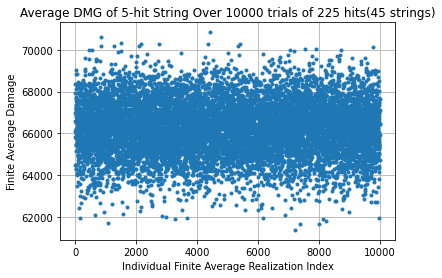

In [7]:
plt.plot(AVGDMG,".")
plt.ylabel("Finite Average Damage")
plt.xlabel("Individual Finite Average Realization Index")
plt.title("Average DMG of 5-hit String Over 10000 trials of 225 hits(45 strings)")
plt.grid()

Text(0, 0.5, 'Number of Samples in Damage Bins ')

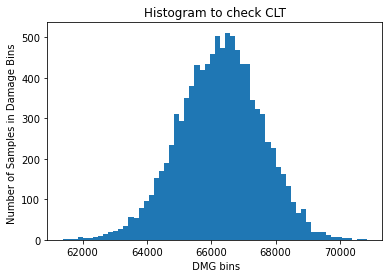

In [8]:
plt.hist(AVGDMG, bins='auto') 
plt.title("Histogram to check CLT")
plt.xlabel(" DMG bins")
plt.ylabel("Number of Samples in Damage Bins ")

In [9]:
AVG=np.average(AVGDMG)
Summand=(AVGDMG-AVG)**2.0
sigma=np.sqrt(np.sum(Summand)/TotalYSamples)

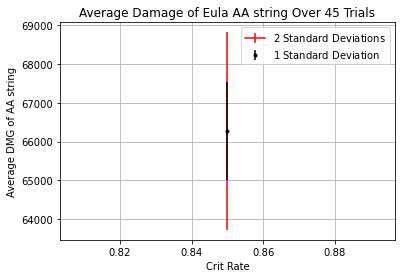

In [10]:
plt.errorbar(PCR,AVG, yerr=2*sigma,fmt='r',label="$2$ Standard Deviations")
plt.errorbar(PCR,AVG, yerr=sigma,fmt='.k', label="$1$ Standard Deviation" )
plt.ylabel("Average DMG of AA string")
plt.xlabel("Crit Rate")
plt.legend()
plt.title("Average Damage of Eula AA string Over 45 Trials")
plt.grid()